# Data viz of prevalence of diabetes in women
## Database from Kaggle
### Sergio L. Marrugo, June 2024
### In this notebook we will assess visually the relationship between the prevalence of diabetes  different measurements in a sample of women.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [37]:
diabetes_filepath = "C:/Users/EQUIPO/Desktop/py4e/Data_science_portfolio/Data_Science/diabetes.csv"
diabetes_data = pd.read_csv(diabetes_filepath)

In [38]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes_data.shape

(768, 9)

In [40]:
diabetes_data.isnull().any()
#We don't have any missing data in our dataset

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [41]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: xlabel='Outcome', ylabel='SkinThickness_na'>

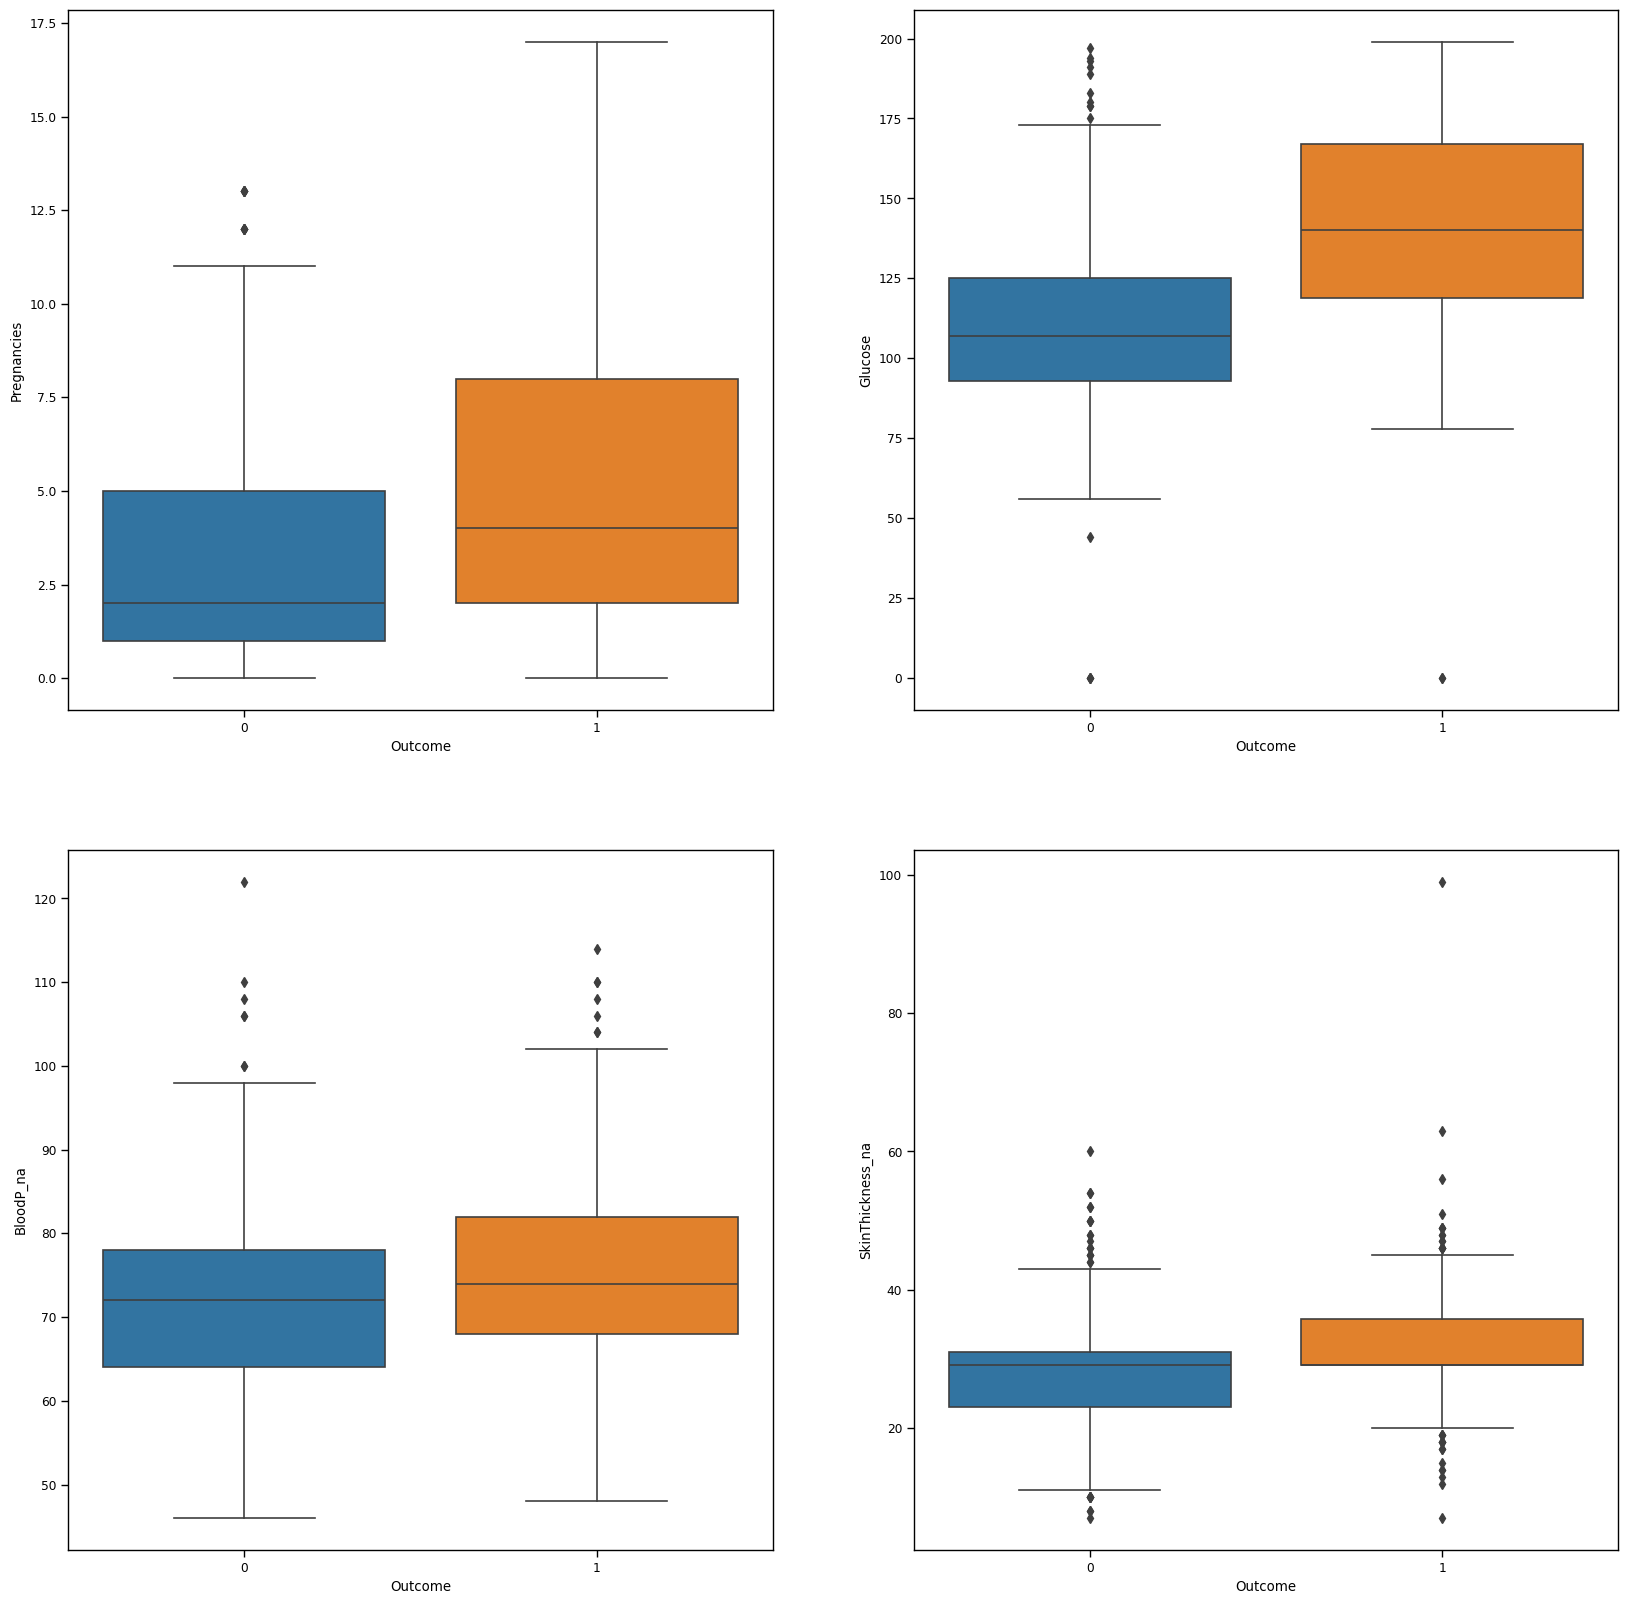

In [92]:
#Outcome is our dependent variable, we start by visualizing the means of the other mvariables when divided by the outcome column, variables with na were created below
sns.set_context("paper")
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(data = diabetes_data, x = 'Outcome', y = 'Pregnancies', ax =ax[0,0])
sns.boxplot(data = diabetes_data, x = 'Outcome', y = 'Glucose', ax = ax[0,1])
sns.boxplot(data = diabetes_data, x = 'Outcome', y = 'BloodP_na', ax = ax[1,0])
sns.boxplot(data = diabetes_data, x = 'Outcome', y = 'SkinThickness_na', ax = ax[1,1])

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

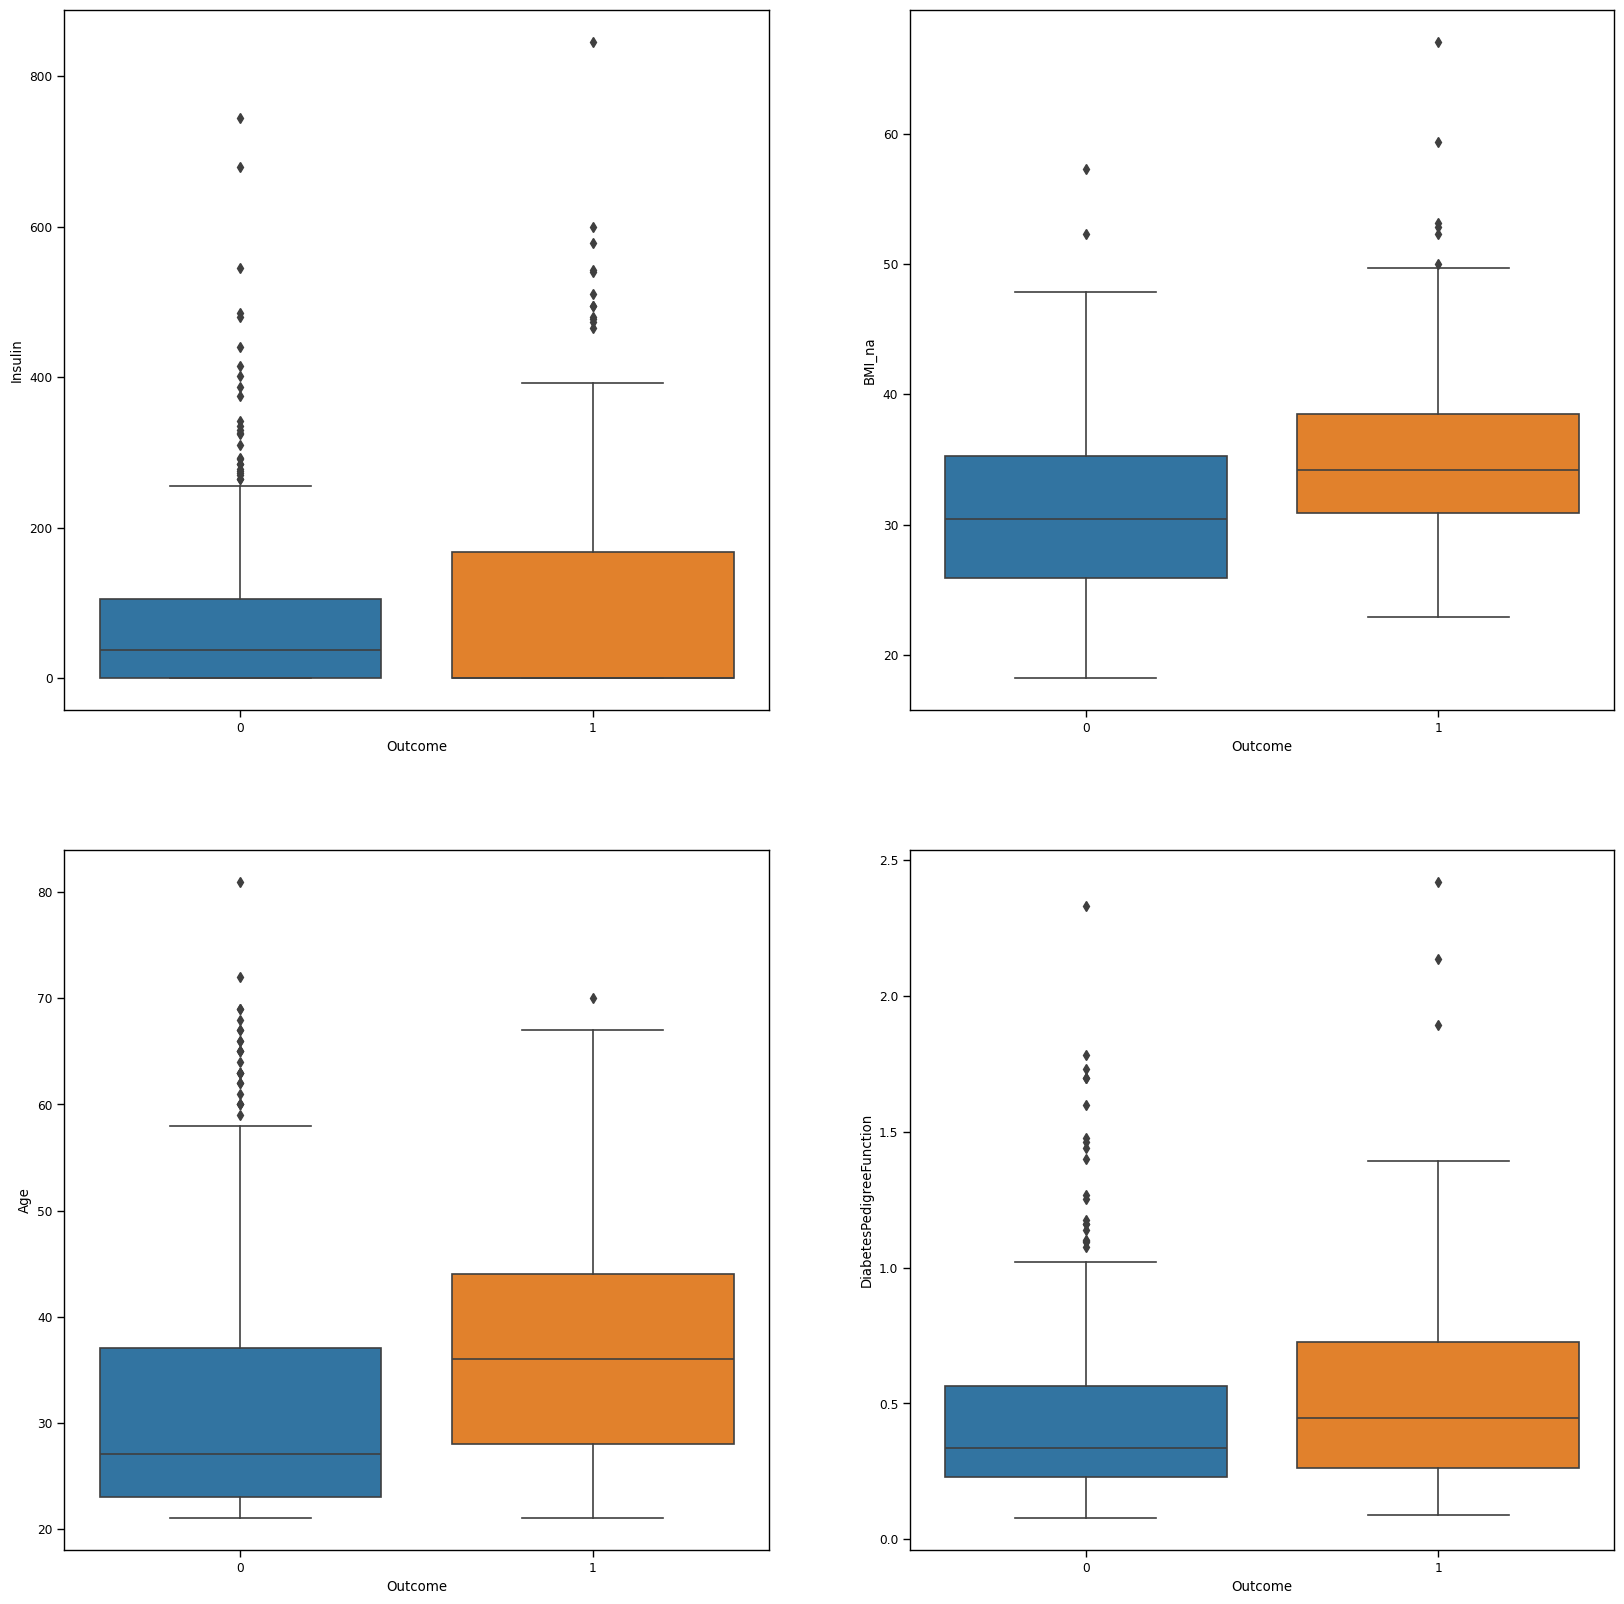

In [94]:
sns.set_context("paper")
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(data = diabetes_data, x = 'Outcome', y = 'Insulin', ax =ax[0,0])
sns.boxplot(data = diabetes_data, x = 'Outcome', y = 'BMI_na', ax = ax[0,1])
sns.boxplot(data = diabetes_data, x = 'Outcome', y = 'Age', ax = ax[1,0])
sns.boxplot(data = diabetes_data, x = 'Outcome', y = 'DiabetesPedigreeFunction', ax = ax[1,1])

In [ ]:
diabetes_data.loc[(diabetes_data.BMI == 0) | (diabetes_data.BloodPressure == 0) | (diabetes_data.SkinThickness == 0)]

In [ ]:
#It seems like the columns BMI, SkinThickness and BloodPressure with values 0 are incorrect
fig, ax = plt.subplots(1,3, figsize=(20,20))
sns.histplot(diabetes_data, x = "SkinThickness", bins = 20, kde = True, ax =ax[0])
sns.histplot(diabetes_data, x = "BloodPressure", kde = True, ax =ax[1])
sns.histplot(diabetes_data, x = "BMI", kde = True, ax =ax[2])

### Taking a closer look to the data it is likely that zero values in the aforementioned varaiables are mistakes, probably these are meant to be null values.

In [54]:
#Let's create a function to transform zoroes into NA
def to_na(num):
    if num == 0:
        return None
    else:
        return num

In [56]:
#apply to the desired variables and check if the zeroes were removed
SkinThickness_na = diabetes_data['SkinThickness'].apply(to_na)
SkinThickness_na.isnull().any()

True

In [58]:
BloodP_na = diabetes_data['BloodPressure'].apply(to_na)
BloodP_na.isnull().any()

True

In [60]:
BMI_na = diabetes_data['BMI'].apply(to_na)
BMI_na.isnull().any()

True

In [62]:
#Let's attach the columns that were transformed with null values so we can impute those later
diabetes_data['SkinThickness_na'] = SkinThickness_na
diabetes_data['BloodP_na'] = BloodP_na
diabetes_data['BMI_na'] = BMI_na
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_na,BloodP_na,BMI_na
0,6,148,72,35,0,33.6,0.627,50,1,35.0,72.0,33.6
1,1,85,66,29,0,26.6,0.351,31,0,29.0,66.0,26.6
2,8,183,64,0,0,23.3,0.672,32,1,NaN,64.0,23.3
3,1,89,66,23,94,28.1,0.167,21,0,23.0,66.0,28.1
4,0,137,40,35,168,43.1,2.288,33,1,35.0,40.0,43.1


In [64]:
#Some individuals seem to have extremely low values for distolic pressure (Which is probably other mistake)
diabetes_data.loc[(diabetes_data.BloodP_na < 45)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_na,BloodP_na,BMI_na
4,0,137,40,35,168,43.1,2.288,33,1,35.0,40.0,43.1
18,1,103,30,38,83,43.3,0.183,33,0,38.0,30.0,43.3
80,3,113,44,13,0,22.4,0.140,22,0,13.0,44.0,22.4
125,1,88,30,42,99,55.0,0.496,26,1,42.0,30.0,55.0
575,1,119,44,47,63,35.5,0.280,25,0,47.0,44.0,35.5
576,6,108,44,20,130,24.0,0.813,35,0,20.0,44.0,24.0
597,1,89,24,19,25,27.8,0.559,21,0,19.0,24.0,27.8
599,1,109,38,18,120,23.1,0.407,26,0,18.0,38.0,23.1
741,3,102,44,20,94,30.8,0.400,26,0,20.0,44.0,30.8


In [66]:
#Drop the values with pressure below 45 (these values don't meake sense in a healthy person)
indices_to_drop = diabetes_data[diabetes_data['BloodP_na'] < 45].index
diabetes_data.drop(indices_to_drop, inplace=True)
diabetes_data.shape

(759, 12)

In [68]:
#Now we impute the NA values for BloodP_na, SkinThickness_na and BMI_na by their mean value
BloodP_imputed = diabetes_data['BloodP_na'].apply(lambda x: diabetes_data['BloodP_na'].mean() if pd.isnull(x) else x)

In [70]:
diabetes_data['BloodP_na'] = BloodP_imputed

In [72]:
BMI_imputed = diabetes_data['BMI_na'].apply(lambda x: diabetes_data['BMI_na'].mean() if pd.isnull(x) else x)

In [74]:
diabetes_data['BMI_na']= BMI_imputed

In [76]:
SkinThickness_imputed = diabetes_data['SkinThickness_na'].apply(lambda x: diabetes_data['SkinThickness_na'].mean() if pd.isnull(x) else x)

In [78]:
diabetes_data['SkinThickness_na'] = SkinThickness_imputed

In [80]:
#We are clean of null values on our data!
diabetes_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
SkinThickness_na            False
BloodP_na                   False
BMI_na                      False
dtype: bool

C:\Users\EQUIPO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EQUIPO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EQUIPO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI_na', ylabel='Count'>

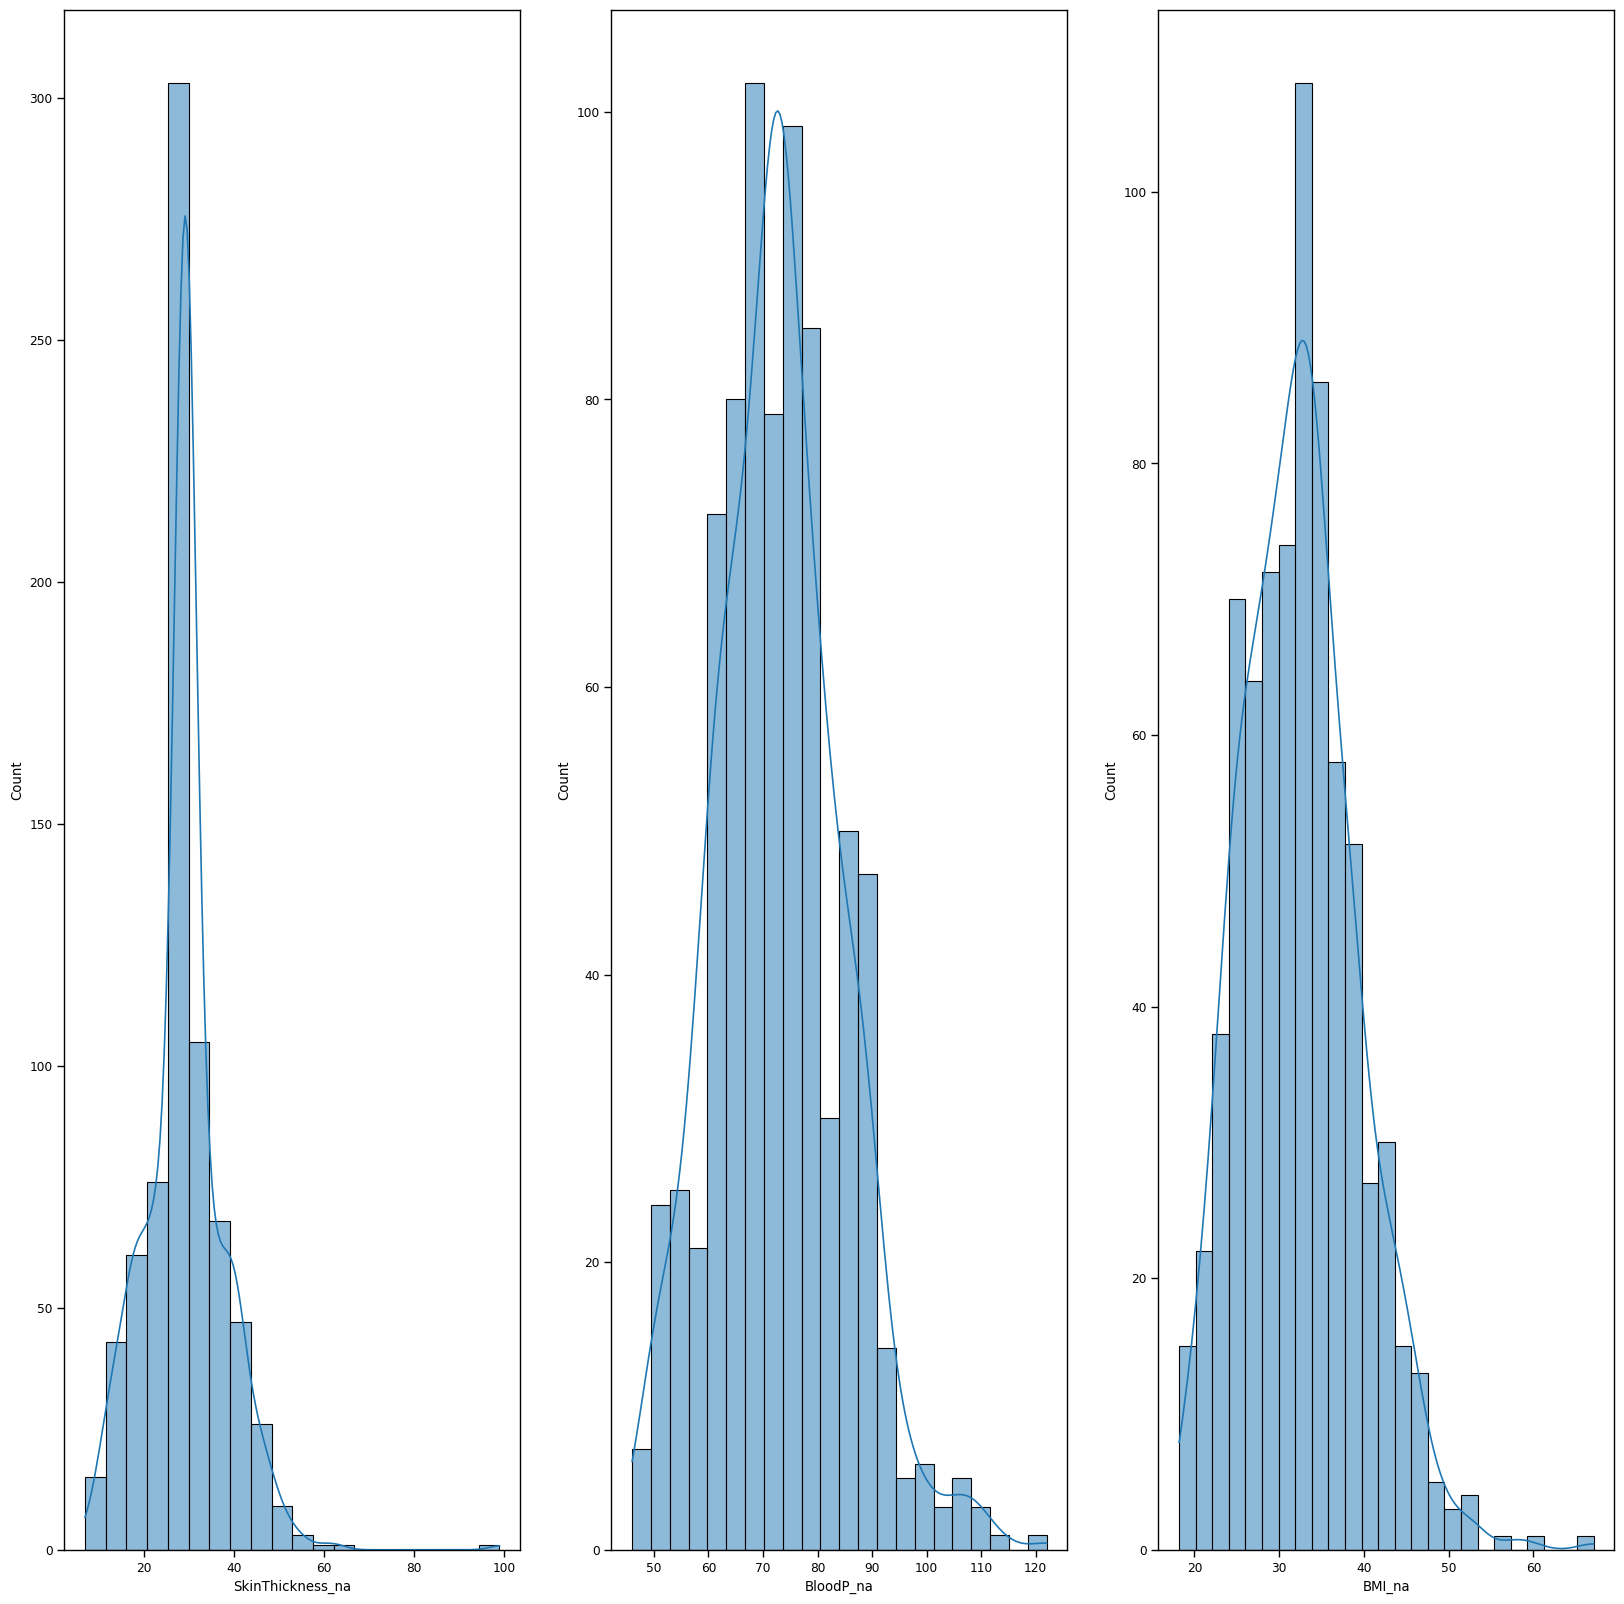

In [82]:
#Plot the imputed columns
fig, ax = plt.subplots(1,3, figsize=(20,20))
sns.histplot(diabetes_data, x = "SkinThickness_na", bins = 20, kde = True, ax =ax[0])
sns.histplot(diabetes_data, x = "BloodP_na", kde = True, ax =ax[1])
sns.histplot(diabetes_data, x = "BMI_na", kde = True, ax =ax[2])

<Axes: xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

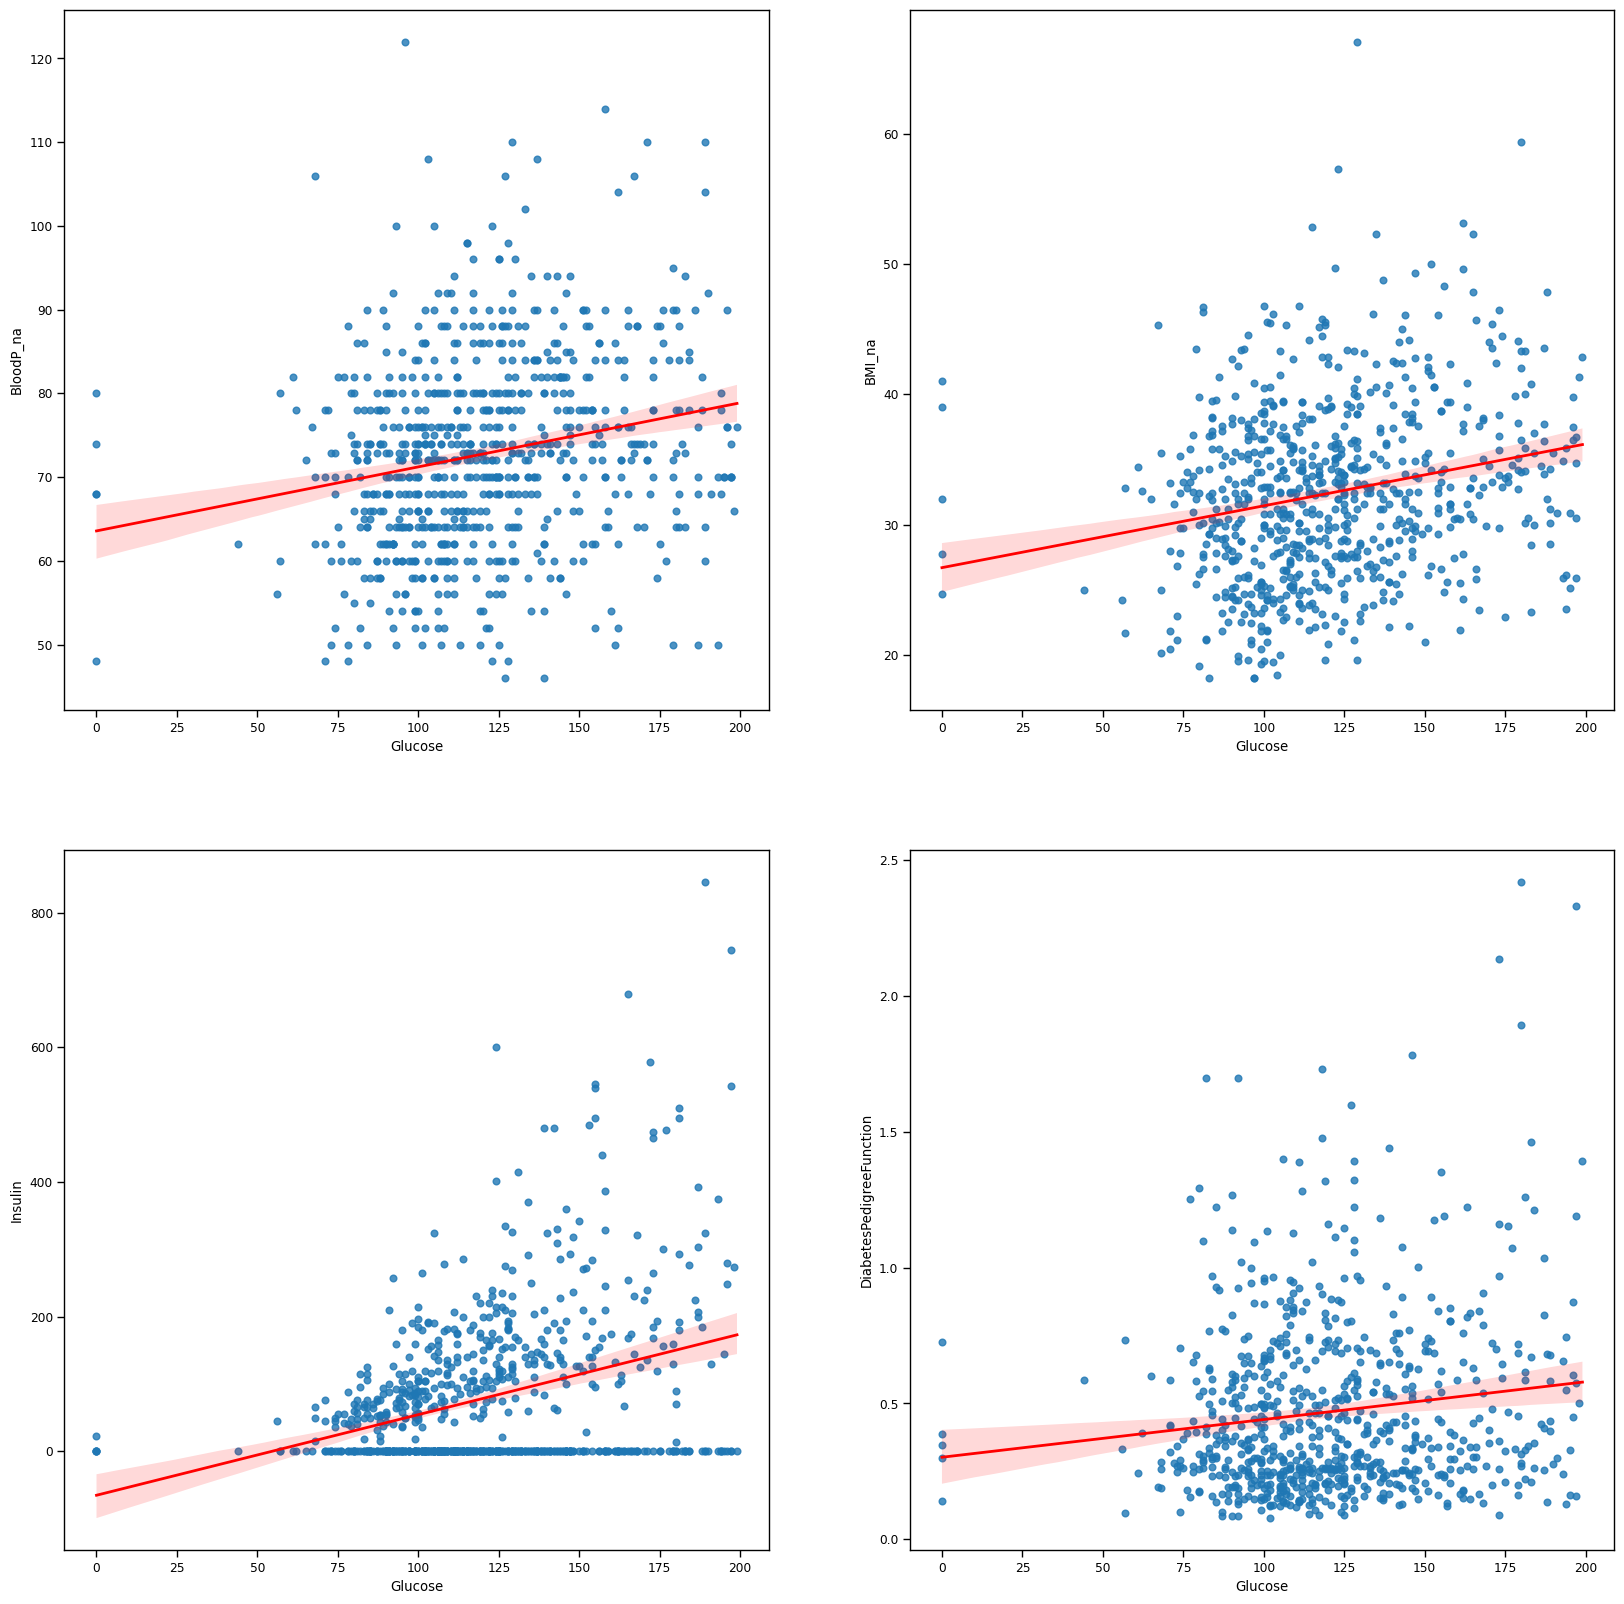

In [84]:
#Now we can start looking for data correlations
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.regplot(ax = ax[0,0], data = diabetes_data, x = 'Glucose', y= 'BloodP_na', 
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[0,1], data = diabetes_data, x = 'Glucose', y= 'BMI_na',
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[1,0], data = diabetes_data, x = 'Glucose', y= 'Insulin',
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[1,1],data = diabetes_data, x = 'Glucose', y= 'DiabetesPedigreeFunction',
            line_kws={'lw': 2, 'color': 'red'})

<Axes: xlabel='BloodP_na', ylabel='Pregnancies'>

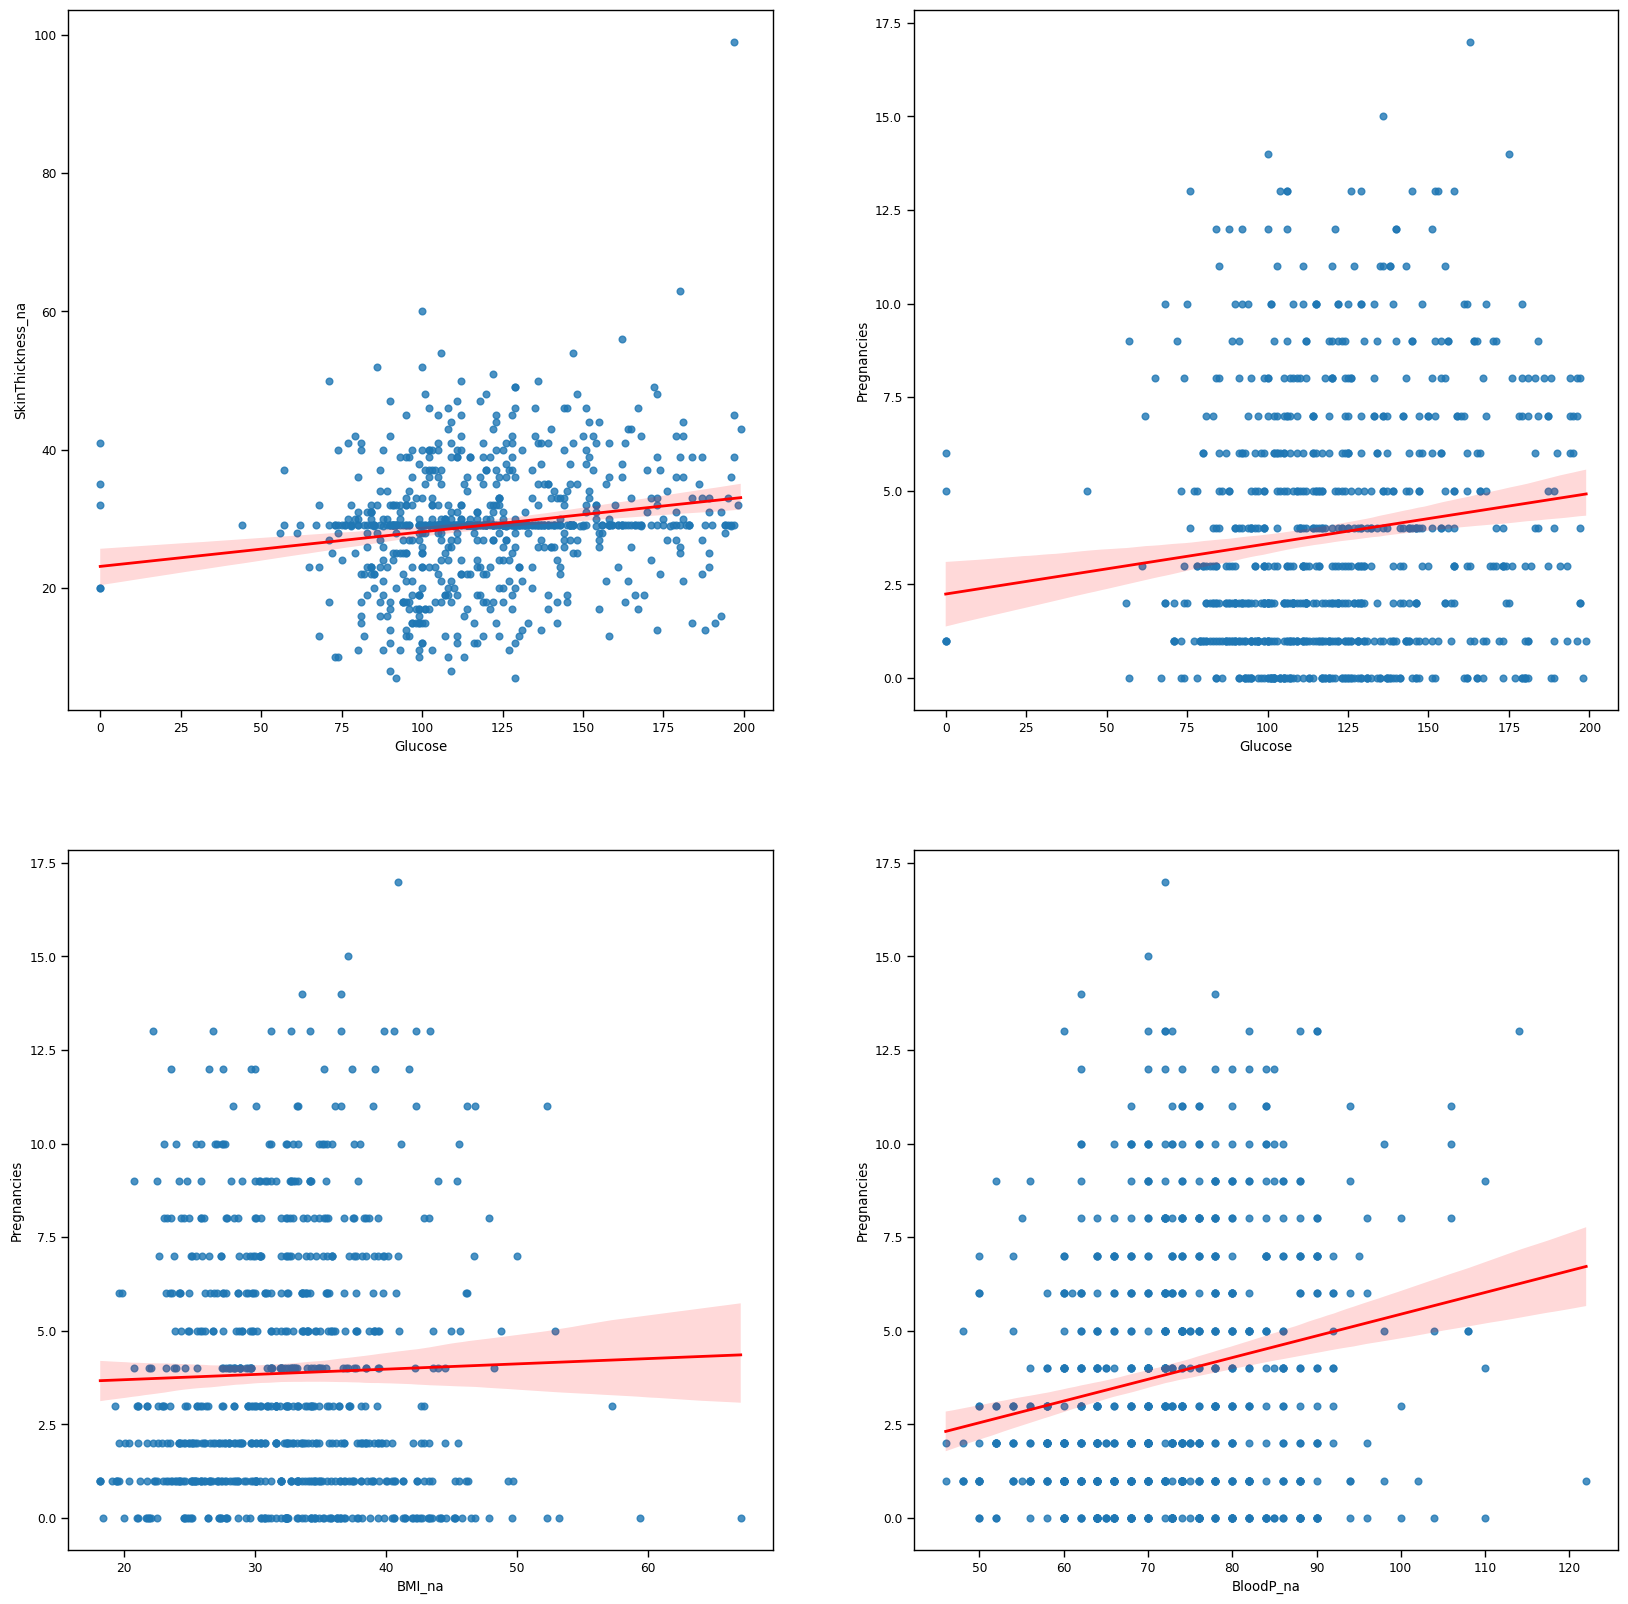

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.regplot(ax = ax[0,0], data = diabetes_data, x = 'Glucose', y= 'SkinThickness_na', 
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[0,1], data = diabetes_data, x = 'Glucose', y= 'Pregnancies',
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[1,0], data = diabetes_data, x = 'BMI_na', y= 'Pregnancies',
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[1,1],data = diabetes_data, x = 'BloodP_na', y= 'Pregnancies',
            line_kws={'lw': 2, 'color': 'red'})

<Axes: xlabel='Age', ylabel='BloodP_na'>

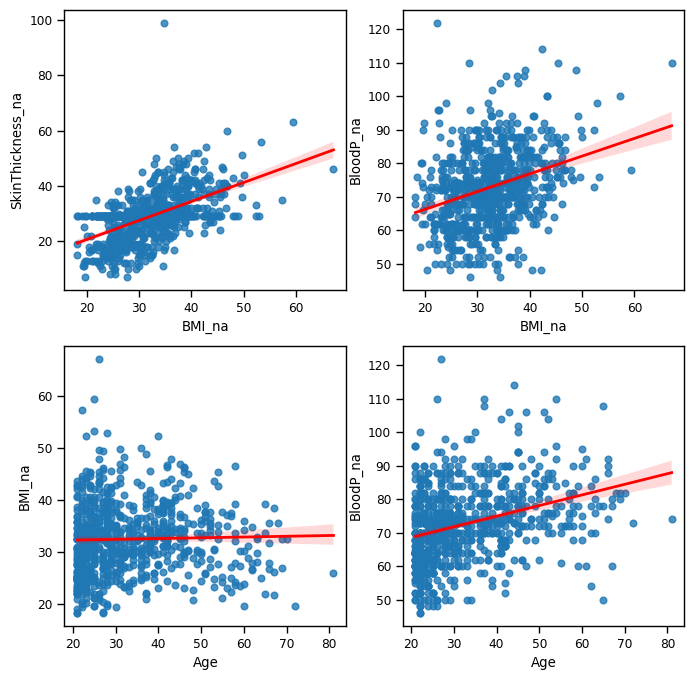

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
sns.regplot(ax = ax[0,0], data = diabetes_data, x = 'BMI_na', y= 'SkinThickness_na', 
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[0,1], data = diabetes_data, x = 'BMI_na', y= 'BloodP_na',
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[1,0], data = diabetes_data, x = 'Age', y= 'BMI_na',
            line_kws={'lw': 2, 'color': 'red'})
sns.regplot(ax = ax[1,1],data = diabetes_data, x = 'Age', y= 'BloodP_na',
            line_kws={'lw': 2, 'color': 'red'})

In [90]:
#It seems like there are a few interesting correlations in the data!

In [ ]:
diabetes_data.to_csv('Diabetes_imputed.csv', index = False)